# Introduction to Statistical Classification:
* Machine learning method based on supervised learning.
* Categories are predefined (unlike clustering in unsupervised learning).
* For two categories, the problem is known as binary classification. 
* Classifier assigns the most probable class to new observation, given the training set of examples.
* Bayes - density based classifiers vs. non density based classifiers.

## Curse of dimensionality

* When the dimensionality increases, the volume of the space increases so fast that the available data become sparse. 
* To obtain a statistically reliable result, the amount of data needed to support the result often grows exponentially with the dimensionality.
* In classification, an enormous amount of training data is required to ensure that there are several samples with each combination of values.
* The peaking paradox (Hughes phenomenon).
 
 ![Peaking](pics/Peaking.png)
 * Balancing feature size, training set size and the choice of the classifier is a basic problem in the design of classification problems.




## Overtraining 
* It happens if the complexity of the system we have chosen for training is too large for the given dataset.
* The trained system will adapt to the noise instead of to the class differences.
* The solution is either to enlarge the dataset, but, if not possible, to simplify the system.

## Binary vs. Multiple
Wiki: Classification can be thought of as two separate problems – binary classification and multiclass classification. In binary classification, a better understood task, only two classes are involved, whereas multiclass classification involves assigning an object to one of several classes.[9] Since many classification methods have been developed specifically for binary classification, multiclass classification often requires the combined use of multiple binary classifiers. 

## Linear classifier
* Linear Discriminant Analysis (or Fisher's linear discriminant) (LDA)—assumes Gaussian conditional density models
* Naive Bayes classifier with multinomial or multivariate Bernoulli event models.
* Logistic regression—maximum likelihood estimation of w → {\displaystyle {\vec {w}}} {\vec {w}} assuming that the observed training set was generated by a binomial model that depends on the output of the classifier.
* Perceptron—an algorithm that attempts to fix all errors encountered in the training set
* Support vector machine—an algorithm that maximizes the margin between the decision hyperplane and the examples in the training set.


Decision trees,Random forests

Neural networks

## Binary classification metrics
* Precision, Accuracy, Sensitivity, Specificity
 
![Precisionrecall](pics/Precisionrecall.png)

## Precision, recall and ROC

* true positive  (TP)
* true negative  (TN)
* false positive (FP)
* false negative (FN)

* sensitivity, recall, hit rate, or true positive rate (TPR)
$$  {TPR} ={\frac { {TP} }{ {P} }}={\frac { {TP} }{ {TP} + {FN} }}=1- {FNR} $$

* specificity, selectivity or true negative rate (TNR)
$$ {TNR} ={\frac { {TN} }{ {N} }}={\frac { {TN} }{ {TN} + {FP} }}=1- {FPR} $$

* precision or positive predictive value (PPV)
$${  {PPV} ={\frac { {TP} }{ {TP} + {FP} }}=1- {FDR} }$$

* negative predictive value (NPV)
$${  {NPV} ={\frac { {TN} }{ {TN} + {FN} }}=1- {FOR} } $$

* false positive rate (FPR) (alpha - type I error)
$$ {  {FPR} ={\frac { {FP} }{ {N} }}={\frac { {FP} }{ {FP} + {TN} }}=1- {TNR} } $$

* false negative rate (FNR) (beta - type II error)
$$ {  {FNR} ={\frac { {FN} }{ {P} }}={\frac { {FN} }{ {FN} + {TP} }}=1- {TPR} }$$

* acuracy (ACC)
$$ {  {ACC} ={\frac { {TP} + {TN} }{ {P} + {N} }}={\frac { {TP} + {TN} }{ {TP} + {TN} + {FP} + {FN} }}} $$

* F1 score is the harmonic mean of precision and sensitivity
$${  {F} _{1}=2\cdot {\frac { {PPV} \cdot  {TPR} }{ {PPV} + {TPR} }}={\frac {2 {TP} }{2 {TP} + {FP} + {FN} }}} $$

![ROC_curves](pics/ROC_curves.png)

The generalization of Recall and Precision to multiclass problems is to sum over rows (columns) of the confusion matrix. 

## Cross Validation
covered in the last lesson, 10 can be replaced by k
* 10-fold cross-validation, very popular and has become a standard procedure in many papers and works.
* 10 times 10-fold cross-validation, useful for comparing classifiers as the 10 repeats shrink the standard deviations in the means of the estimated classifier errors.
* 10 times 2-fold cross-validation helps compute the significance of differences in classification error means.
* Leave-one-out (LOO) cross-validation. In this case the number of folds is equal to the number of objects in the design set. 

## Grid Search
* Help us to find the "best" hyperparameters of given method to optimize loss function or evaluation metrics.
* Use pipelines and run the process as much as possible. Depends on time and resources.

Back to code ...




In [188]:
import numpy as np
import pandas as pd
import os
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [189]:
# load our dataset
data = 'data/attrition.csv'
df = pd.read_csv(data)

In [190]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [191]:
df.describe(include=['object'])

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


In [192]:
df = df.sample(frac=1, random_state=42)
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [193]:
# let's drop EmployeeID
df.drop(['EmployeeNumber', 'EmployeeCount','StandardHours','Over18'], axis=1, inplace=True)

In [194]:
# select response variable and features
target_col_name = 'Attrition'
num_feature_cols = [
        'Age', 'DailyRate','DistanceFromHome', 'Education',
        'HourlyRate', 'EnvironmentSatisfaction', 'JobInvolvement','JobLevel',
        'JobSatisfaction', 'NumCompaniesWorked', 'PercentSalaryHike',
        'RelationshipSatisfaction', 'StockOptionLevel', 'PerformanceRating',
        'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
        'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
        'YearsWithCurrManager', 'MonthlyRate']
cat_feature_cols = [x for x in df.columns if x not in num_feature_cols and x not in [target_col_name]]

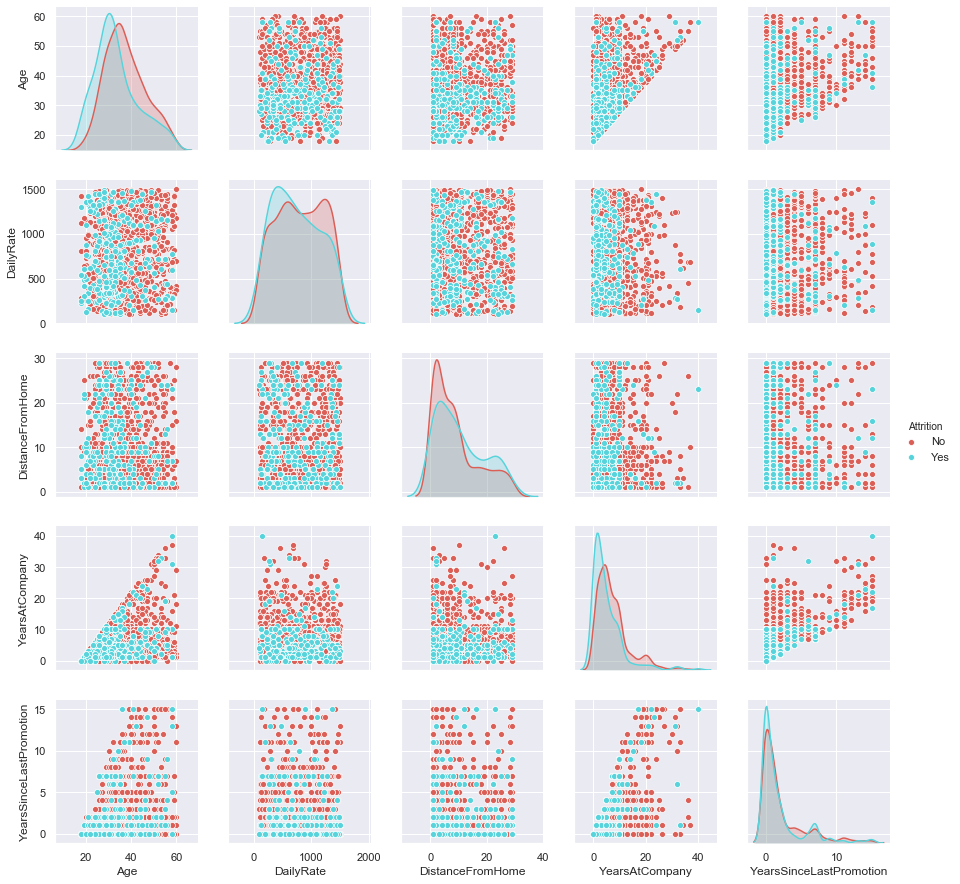

In [195]:
sns.pairplot(df, hue="Attrition",vars=['Age','DailyRate','DistanceFromHome','YearsAtCompany','YearsSinceLastPromotion'],palette="hls")

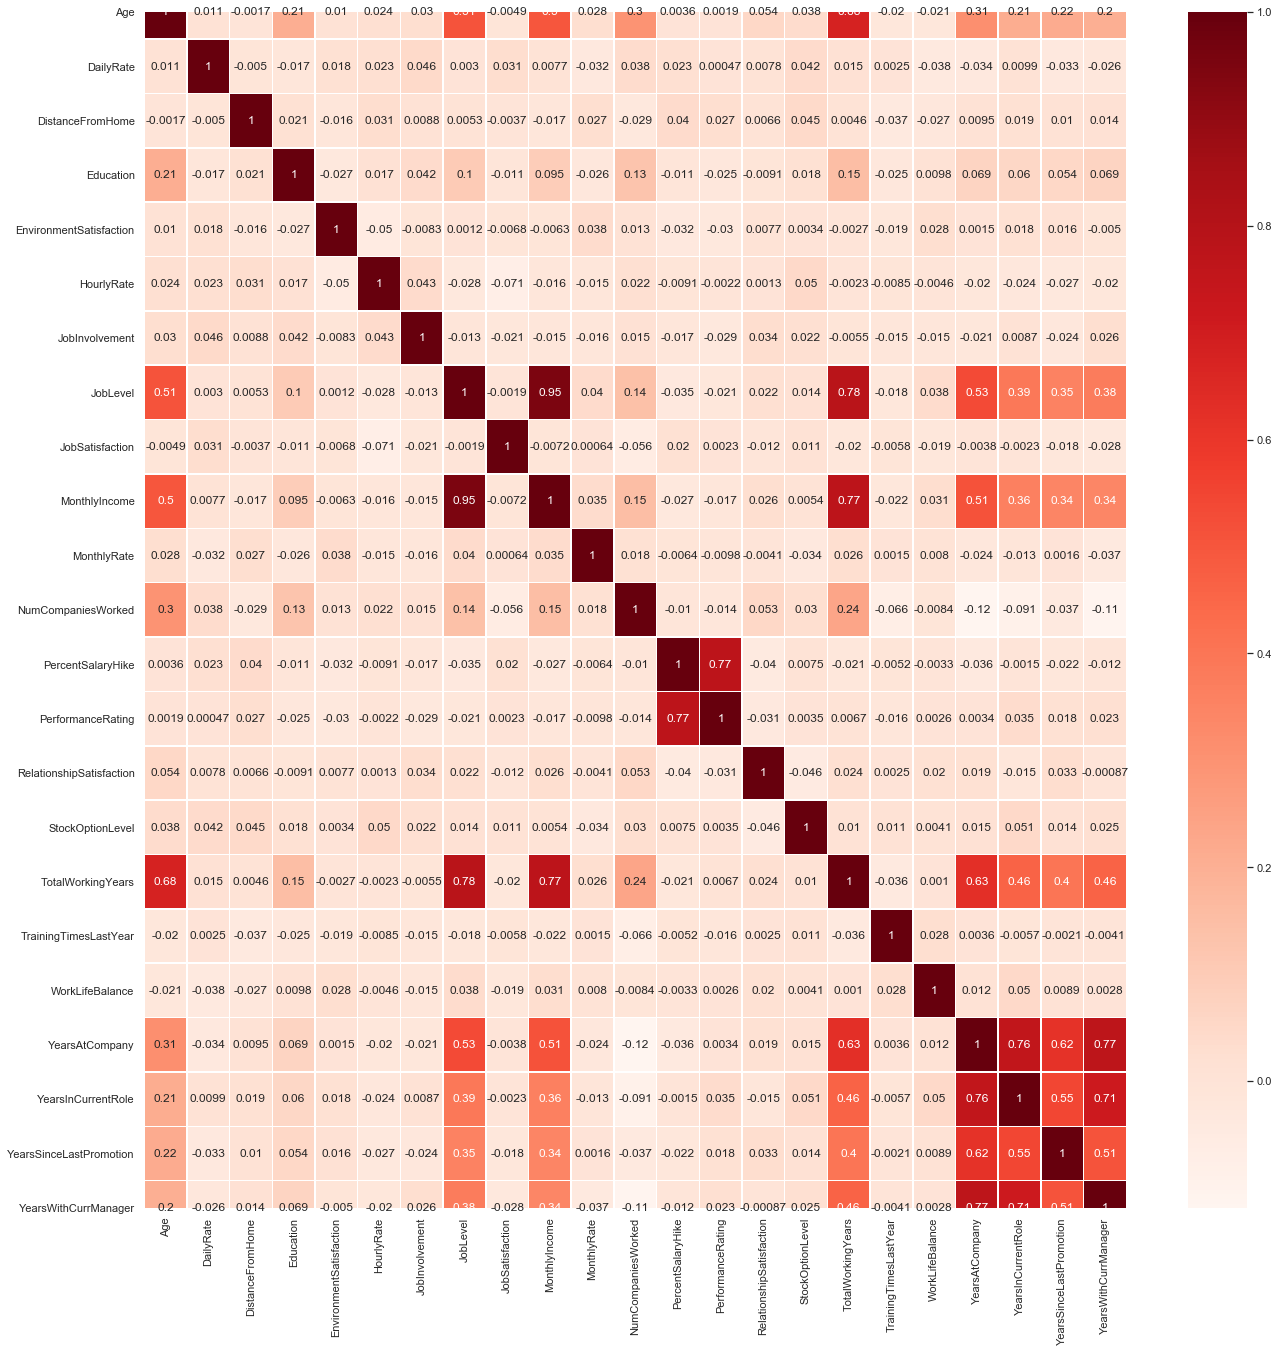

In [196]:
plt.figure(figsize=(22,22))
sns.heatmap(df.corr(), cmap='Reds',linewidth=.5,annot=True)
sns.set(font_scale=1)

In [197]:
# cast numerical columns as float
for col in num_feature_cols:
    df[col] = df[col].astype(float)

In [198]:
df_target = np.ravel(df[[target_col_name]])
df_features = df[num_feature_cols]
df_target

array(['No', 'No', 'Yes', ..., 'Yes', 'No', 'No'], dtype=object)

In [199]:
X_train, X_test, y_train, y_test = train_test_split(df_features, df_target, test_size=0.33, random_state=42)

In [200]:
# Use standard version of logistic regression
logmodel=LogisticRegression()
logmodel.fit(X_train, Y_train)

C:\Users\Jiri\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [201]:
Y_pred=logmodel.predict(X_test)
classification_report(Y_test, Y_pred)
target_names = ['No', 'Yes']
print(classification_report(Y_test, Y_pred, target_names))
# Note that in binary classification, 
# recall of the positive class is also known as “sensitivity”;
# recall of the negative class is “specificity”.

              precision    recall  f1-score   support

          No       0.86      0.99      0.92       417
         Yes       0.44      0.06      0.10        69

    accuracy                           0.86       486
   macro avg       0.65      0.52      0.51       486
weighted avg       0.80      0.86      0.81       486



In [202]:
confusion_matrix(Y_test, Y_pred)


array([[412,   5],
       [ 65,   4]], dtype=int64)

Text(0.5, 1, 'Confusion matrix')

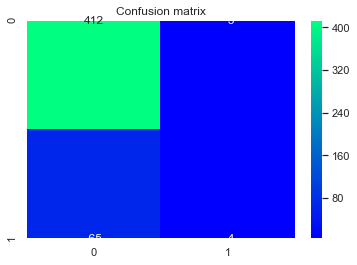

In [203]:
sns.heatmap(confusion_matrix(Y_test,Y_pred),annot=True,fmt='3.0f',cmap="winter")
plt.title('Confusion matrix', y=1, size=12)

In [204]:
#Example of R style analysis :-D
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats

mod1 = smf.glm(formula='Attrition ~Age * DailyRate + DistanceFromHome + Education + HourlyRate', data=df, family=sm.families.Binomial()).fit()
mod1.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                          Generalized Linear Model Regression Results                          
===============================================================================================
Dep. Variable:     ['Attrition[No]', 'Attrition[Yes]']   No. Observations:                 1470
Model:                                             GLM   Df Residuals:                     1463
Model Family:                                 Binomial   Df Model:                            6
Link Function:                                   logit   Scale:                          1.0000
Method:                                           IRLS   Log-Likelihood:                -622.73
Date:                                 Wed, 06 Nov 2019   Deviance:                       1245.5
Time:                                         15:12:14   Pearson chi2:                 1.53e+03
No. Iterations:                                      5                                         
Covariance Type:                             nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.4113      0.719     -0.572      0.567      -1.821       0.998
Age                  0.0571      0.019      3.034      0.002       0.020       0.094
DailyRate            0.0006      0.001      0.735      0.462      -0.001       0.002
Age:DailyRate    -5.273e-06   2.16e-05     -0.244      0.807   -4.76e-05    3.71e-05
DistanceFromHome    -0.0258      0.009     -3.028      0.002      -0.043      -0.009
Education           -0.0126      0.072     -0.175      0.861      -0.154       0.129
HourlyRate           0.0004      0.004      0.116      0.907      -0.007       0.007
====================================================================================
"""

In [205]:
#Creating K fold Cross-validation 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kf = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(logmodel, # model
                         X_train, # Feature matrix
                         Y_train, # Target vector
                         cv=kf, # Cross-validation technique
                         scoring="accuracy", # Loss function
                         n_jobs=-1) # Use all CPU scores
print('10 fold CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))


10 fold CV accuracy: 0.839 +/- 0.039


In [206]:
# Support Vector Machines
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, Y_train)
Y_predSVC = svc.predict(X_test)
print(classification_report(Y_test, Y_predSVC, target_names))



              precision    recall  f1-score   support

          No       0.86      1.00      0.92       417
         Yes       0.00      0.00      0.00        69

    accuracy                           0.86       486
   macro avg       0.43      0.50      0.46       486
weighted avg       0.74      0.86      0.79       486



C:\Users\Jiri\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Jiri\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Neural Networks
* [ ] https://karpathy.github.io/neuralnets/
* [ ] https://playground.tensorflow.org/

### XOR using NN
Let's predict Exclusive OR using NN

```
+---+---+---------+
| A | B | A XOR B |
+---+---+---------+
| 1 | 1 | 0       |
+---+---+---------+
| 1 | 0 | 1       |
+---+---+---------+
| 0 | 1 | 1       |
+---+---+---------+
| 0 | 0 | 0       |
+---+---+---------+
```

It's a binary classification problem, and a supervised one. Our task is to create a neural network that will predict the values of one logical function given the inputs.

Let's assume the simple shallow architecture with hidden layer
![NNet](pics/NNEt.png)

* `X1,X2` = data input
* `N1,N2,N3` = neurons
* `B1,B2` = bias
* `W..` = weights
* `b..` = bias weights
* `Y` = output

Bias node is "always on" -- in NN has the role of the intercept and it's providing a way to get non-zero output on zero inputs. Without bias, the activation of features = 0 would be always zero. When using sigmoid function for example, the output of the (0,0) would be 0.5. 

We'll assume sigmoid neurons:
* they accept real values as inputs
* the value of activation is a dot product of weights and inputs (+ bias), i.e. `W*out_{prev} + b`
* output is a sigmoid function of its activation value

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [3]:
def sigmoid_derivative(x):
    """
    x is assumed to be sigmoid function!
    """
    return x*(1-x)

In [4]:
x = np.arange(-10,10,0.01)

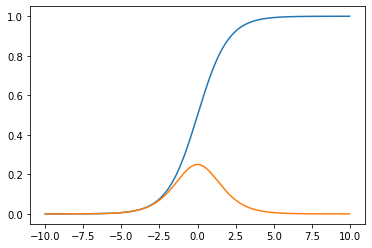

In [5]:
plt.plot(x, sigmoid(x), x, sigmoid_derivative(sigmoid(x)))
plt.show()

#### Learning
Information is stored in connections between the neurons -- the weights. NN learns by updating its weights according to a learning algorithm that helps it converge to the expected output.

* Initialize the weights and biases randomly.
* Iterate over the data
    * Compute the predicted output
    * Compute the loss (distance from the data)
    * `W(new) = W(old) — α ∆W`
    * `b(new) = b(old) — α ∆b`
* Repeat until the error is minimal

Update step is assumed in the direction of gradient descent.

There are two parts to the learning algorithm
* Forward pass (computation of the predicted output)
* Backward pass, aka backpropagation (change of the weights)

#### Data
Let's create our learning dataset

In [6]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])
Y = np.array([[0],[1],[1],[0]])

#### Initialization of the weights and biases
Let's sample normal distribution

In [7]:
def init_params(n_X,n_H,n_Y):
    """
    n_X ... number of input layer neurons
    n_H ... number of hidden layer neurons
    n_Y ... number of output layer neurons
    """
    W1 = np.random.randn(n_X, n_H)
    b1 = np.zeros((1, n_H))
    W2 = np.random.randn(n_H, n_Y)
    b2 = np.zeros((1, n_Y))
    
    return W1,b1,W2,b2

In [8]:
n_X, n_H, n_Y = 2,2,1
W1,b1,W2,b2 = init_params(2,2,1)

In [9]:
print("Initial hidden weights: ",end='')
print(*W1)
print("Initial hidden biases: ",end='')
print(*b1)
print("Initial output weights: ",end='')
print(*W2)
print("Initial output biases: ",end='')
print(*b2)

Initial hidden weights: [-0.60359167 -1.89115936] [-0.41264432 -2.29864712]
Initial hidden biases: [0. 0.]
Initial output weights: [2.13127057] [1.7679483]
Initial output biases: [0.]


In [10]:
epochs = 10000
lr = 0.1

#### Forward propagation
Computing the predicted values

In [11]:
def forward_prop(X,W1,b1,W2,b2):
    hidden_layer_activation = np.dot(X,W1) + b1
    hidden_layer_output = sigmoid(hidden_layer_activation)

    output_layer_activation = np.dot(hidden_layer_output,W2) + b2 
    Y_hat = sigmoid(output_layer_activation)
    
    return hidden_layer_output, Y_hat

#### Error (loss) function
Let's use mean squared error. Typically used rather for regression problems, but we'll ignore that for now.

$E = \frac{1}{2}(Y - Y_{hat})^2$

We're going to need it's derivative (w.r.t. $Y_{hat}$)

$\frac{\partial E}{\partial Y_{hat}} = -(Y - Y_{hat})$

In [12]:
def loss_function(Y,Y_hat):
    loss = 1/2*np.sum(np.power(Y-Y_hat,2))
    
    return loss

In [13]:
def loss_derivative(Y,Y_hat):
    d_loss = -(Y - Y_hat)
    
    return d_loss

#### Backpropagation
Goal of the backpropagation is to change the weights in order to minimize the error/loss. Since the outcome is a function of activation and further activation is a function of weights, so we want to know

$\frac{\partial E}{\partial w21} = \frac{\partial E}{\partial Y_{hat}} * \frac{\partial Y_{hat}}{\partial net_{N3}} * \frac{\partial net_{N3}}{\partial w21}$


We already know the derivative of the error with respect to the prediction. The second term is derivative of the sigmoid

$\frac{\partial Y_{hat}}{\partial net_{N3}} = Y_{hat} * (1 - Y_{hat})$

and the last term is a derivative of the activation by weights, so output of the hidden layer. 

$\frac{\partial net_{N3}}{\partial w21} = out_{N1}$

The same logic applied to other weights.

In [14]:
def back_prop(d_loss, Y_hat, W2, hidden_layer_output):
    d_Y_hat = d_loss * sigmoid_derivative(Y_hat)
    error_hidden_layer = d_Y_hat.dot(W2.T)
    d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)
    
    return d_Y_hat, d_hidden_layer

In [15]:
#Training algorithm
for i in range(epochs):
    #Forward Propagation
    hidden_layer_output, Y_hat = forward_prop(X,W1,b1,W2,b2)

    # Compute loss and derivatives
    loss = loss_function(Y,Y_hat)
    d_loss = loss_derivative(Y,Y_hat)
    
    #Backpropagation
    d_Y_hat, d_hidden_layer = back_prop(d_loss, Y_hat, W2, hidden_layer_output)
    
    #Updating Weights and Biases (Gradient descent)
    W2 = W2 - hidden_layer_output.T.dot(d_Y_hat) * lr
    b2 = b2 - np.sum(d_Y_hat,axis=0,keepdims=True) * lr
    W1 = W1 - X.T.dot(d_hidden_layer) * lr
    b1 = b1 - np.sum(d_hidden_layer,axis=0,keepdims=True) * lr
    
    if(i%1000 == 0):
        print('Loss after iteration# {:d}: {:f}'.format(i, loss))

Loss after iteration# 0: 0.663121
Loss after iteration# 1000: 0.469785
Loss after iteration# 2000: 0.332561
Loss after iteration# 3000: 0.121420
Loss after iteration# 4000: 0.038309
Loss after iteration# 5000: 0.019483
Loss after iteration# 6000: 0.012504
Loss after iteration# 7000: 0.009042
Loss after iteration# 8000: 0.007015
Loss after iteration# 9000: 0.005700


In [16]:
print("Final hidden weights: ",end='')
print(*W1)
print("Final hidden bias: ",end='')
print(*b1)
print("Final output weights: ",end='')
print(*W2)
print("Final output bias: ",end='')
print(*b2)

print("\nOutput from neural network after 10,000 epochs: ",end='')
print(*Y_hat)

Final hidden weights: [-4.01836787 -5.69330361] [-4.01954218 -5.69927816]
Final hidden bias: [5.94390817 2.17828516]
Final output weights: [7.90190432] [-8.19619809]
Final output bias: [-3.63990084]

Output from neural network after 10,000 epochs: [0.04224599] [0.95346989] [0.95345485] [0.05874889]


## Alternatives & Improvements

### Loss functions
* Has significance on learning/updating
* Choose according to the problem
    * Regression: MSE, MSLE, MAE
    * Binary Classification: Binary Cross-Entropy, Hinge loss,...
    * Multi-class Classification: KL-divergence, Multi Cross-Entropy,...
    
### Activation functions
* Linear function
    * combinations are linear, not good approximative properties
    * unbounded range
    * constant learning rate
* Sigmoids
    * in [0,1]
    * non-linear, good for stacking layers
    * sensitive around zero
    * "vanishing gradients" -- near zero learning rate
* Tanh
    * "Scaled Sigmoid", $2*sigmoid(2x)-1$
    * steeper gradient
* ReLu
    * $A(x) = max(x,0)$
    * does not fire up all activations as sigmoids -- that's costly in big networks
    * combinations are non-linear -- good approximator
    * less computationally demanding
    * "dying gradient" -- neurons will stop responding because the gradient = 0 for negative values
    * "leaky ReLu" -- $y=0.01x,\, \mathrm{for}\, x<0$, the idea is to gradient recover itself
    
* Generally, ReLu are the most used one, but sigmoids can be better approximators (if more costly ones)

### Learning step
* some alternatives to backprop, but mostly minor
* https://www.technologyreview.com/s/608911/is-ai-riding-a-one-trick-pony/
* many alternatives to gradient descent!
    * proximal grads
    * evolutionary algorithms
    * Ada optimizers
    * stochastic gradient descent
    
    
### Architecture
* many variants of mostly deep networks
* CNNs (use convolution instead of matrix multiplication) in one or more places
* RNNs (use recurrence, long short-term memory -- good for time-series data, simulate lags)
* more engineering than math

## Keras
High-level framework for NNets.

In [21]:
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd

In [27]:
# load our dataset
data = 'data/attrition.csv'
df = pd.read_csv(data)

In [28]:
# let's drop EmployeeID
df.drop(['EmployeeNumber', 'EmployeeCount'], axis=1, inplace=True)

In [29]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,4,80,1,6,3,3,2,2,2,2


In [30]:
# split to input and predicted data
Xk = df.loc[:,df.columns!='Attrition']
Yk = df.loc[:,'Attrition']

In [31]:
# we're going to reuse some tricks from the last lesson
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

In [60]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [61]:
# let's label numerical columns
num_feature_cols = [ 'Age', 'DailyRate','DistanceFromHome', 'Education',
        'HourlyRate', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel',
        'JobSatisfaction', 'MonthlyIncome','NumCompaniesWorked', 'PercentSalaryHike',
        'RelationshipSatisfaction', 'StockOptionLevel', 'PerformanceRating', 'StandardHours',
        'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
        'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
        'YearsWithCurrManager', 'MonthlyRate']

In [62]:
# and categorical
cat_feature_cols = [x for x in Xk.columns if x not in num_feature_cols]

In [63]:
cat_feature_cols

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

In [36]:
# Pipelines!
num_transformer = Pipeline(steps=[
                  ('imputer', SimpleImputer(strategy='median')),
                  ('scaler', RobustScaler())])

cat_transformer = Pipeline(steps=[
                  ('imputer', SimpleImputer(strategy='most_frequent')),
                  ('onehot', OneHotEncoder(categories='auto', 
                                     sparse=False, 
                                     handle_unknown='ignore'))])

pipeline_preprocess = ColumnTransformer(transformers=[
        ('numerical_preprocessing', num_transformer, num_feature_cols),
        ('categorical_preprocessing', cat_transformer, cat_feature_cols)],
        remainder='passthrough')

pipe0 = Pipeline([("transform_inputs", pipeline_preprocess)])

In [64]:
# apply transformations
Xkk = pipe0.fit_transform(Xk)

In [65]:
# alternative way to get booleans
Ykk = Yk.str.get_dummies().iloc[:,1]

In [69]:
Xk_train, Xk_test, Yk_train, Yk_test = train_test_split(Xkk, Ykk, test_size=0.3)


[[-0.92307692  0.97398844 -0.25       ...  1.          0.
   1.        ]
 [-1.38461538  0.7283237  -0.16666667 ...  1.          0.
   1.        ]
 [ 0.61538462 -0.26156069  0.66666667 ...  1.          1.
   0.        ]
 ...
 [-0.46153846 -0.95953757  1.25       ...  1.          0.
   1.        ]
 [ 1.15384615 -0.04624277 -0.16666667 ...  1.          0.
   1.        ]
 [-0.46153846  0.90317919 -0.41666667 ...  1.          1.
   0.        ]]


In [40]:
model = Sequential()
#First Hidden Layer
model.add(Dense(4, activation='relu', kernel_initializer='random_normal', input_dim=53))
#Second  Hidden Layer
model.add(Dense(4, activation='relu', kernel_initializer='random_normal'))
#Output Layer
model.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))

In [41]:
#Compiling the neural network
model.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])

In [42]:
model.fit(Xk_train,Yk_train, batch_size=10, epochs=100)

Epoch 1/100
1029/1029 [==============================] - 0s 280us/step - loss: 0.6544 - accuracy: 0.8367
Epoch 2/100
1029/1029 [==============================] - 0s 161us/step - loss: 0.4799 - accuracy: 0.8397
Epoch 3/100
1029/1029 [==============================] - 0s 158us/step - loss: 0.4096 - accuracy: 0.8397
Epoch 4/100
1029/1029 [==============================] - 0s 177us/step - loss: 0.3894 - accuracy: 0.8397
Epoch 5/100
1029/1029 [==============================] - 0s 166us/step - loss: 0.3725 - accuracy: 0.8397
Epoch 6/100
1029/1029 [==============================] - 0s 148us/step - loss: 0.3574 - accuracy: 0.8397
Epoch 7/100
1029/1029 [==============================] - 0s 149us/step - loss: 0.3456 - accuracy: 0.8397
Epoch 8/100
1029/1029 [==============================] - 0s 145us/step - loss: 0.3372 - accuracy: 0.8397
Epoch 9/100
1029/1029 [==============================] - 0s 161us/step - loss: 0.3308 - accuracy: 0.8397
Epoch 10/100
1029/1029 [==============================]

1029/1029 [==============================] - 0s 185us/step - loss: 0.2613 - accuracy: 0.8989
Epoch 78/100
1029/1029 [==============================] - 0s 143us/step - loss: 0.2610 - accuracy: 0.9009
Epoch 79/100
1029/1029 [==============================] - 0s 146us/step - loss: 0.2622 - accuracy: 0.8950
Epoch 80/100
1029/1029 [==============================] - 0s 159us/step - loss: 0.2606 - accuracy: 0.9009
Epoch 81/100
1029/1029 [==============================] - 0s 149us/step - loss: 0.2619 - accuracy: 0.8999
Epoch 82/100
1029/1029 [==============================] - 0s 144us/step - loss: 0.2604 - accuracy: 0.8980
Epoch 83/100
1029/1029 [==============================] - 0s 148us/step - loss: 0.2605 - accuracy: 0.9018
Epoch 84/100
1029/1029 [==============================] - 0s 146us/step - loss: 0.2603 - accuracy: 0.8970
Epoch 85/100
1029/1029 [==============================] - 0s 145us/step - loss: 0.2598 - accuracy: 0.8980
Epoch 86/100
1029/1029 [==============================] - 0

In [43]:
[loss_train, accuracy_train] = model.evaluate(Xk_train, Yk_train)
print('Loss and accuracy on train set {:f}: {:f}'.format(loss_train, accuracy_train))

1029/1029 [==============================] - 0s 40us/step
Loss and accuracy on train set 0.253622: 0.900875


In [44]:
# Let's predict on test set
Yk_pred = model.predict(Xk_test)
Yk_pred = (Yk_pred>0.5)

In [45]:
# Evaluate the model
cm = confusion_matrix(Yk_test, Yk_pred)
accuracy = accuracy_score(Yk_test, Yk_pred)
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Confusion matrix, without normalization')
print(cm,'\n')
print('Normalized confusion matrix')
print(cm_norm,'\n')
print('Accuracy of classification {:f}'.format(accuracy))

Confusion matrix, without normalization
[[356  13]
 [ 38  34]] 

Normalized confusion matrix
[[0.96476965 0.03523035]
 [0.52777778 0.47222222]] 

Accuracy of classification 0.884354
